In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

#### Read the dataset

In [7]:
import os

In [ ]:
# os.chdir('E:/')

In [9]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [10]:
df.shape

(36275, 19)

In [23]:
df['Booking_ID'].nunique()

36275

#### Check Null Values

In [11]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Check Duplicates

In [20]:
df.duplicated().sum()

0

####  Target Variable

In [21]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [24]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

#### Separate Numerical and Categorical Features

In [25]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)
print(num_cols)

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')
Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


In [27]:
for i in cat_cols[1:]:
    print(i,df[i].unique())

type_of_meal_plan ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking_status ['Not_Canceled' 'Canceled']


In [29]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [30]:
df1 = df.copy()

In [32]:
# df['room_type_reserved'] = df['room_type_reserved'].str.slice(-1)

# start,end,step

In [34]:

dr = {'Room_Type 1': '1',
         'Room_Type 4': '4',
         'Room_Type 6': '6',
         'Room_Type 2': '2',
         'Room_Type 5': '5',
         'Room_Type 7': '7',
         'Room_Type 3': '3'}

df['room_type_reserved'] = df['room_type_reserved'].replace(dr)

In [35]:
df['room_type_reserved'].value_counts()

1    28130
4     6057
6      966
2      692
5      265
7      158
3        7
Name: room_type_reserved, dtype: int64

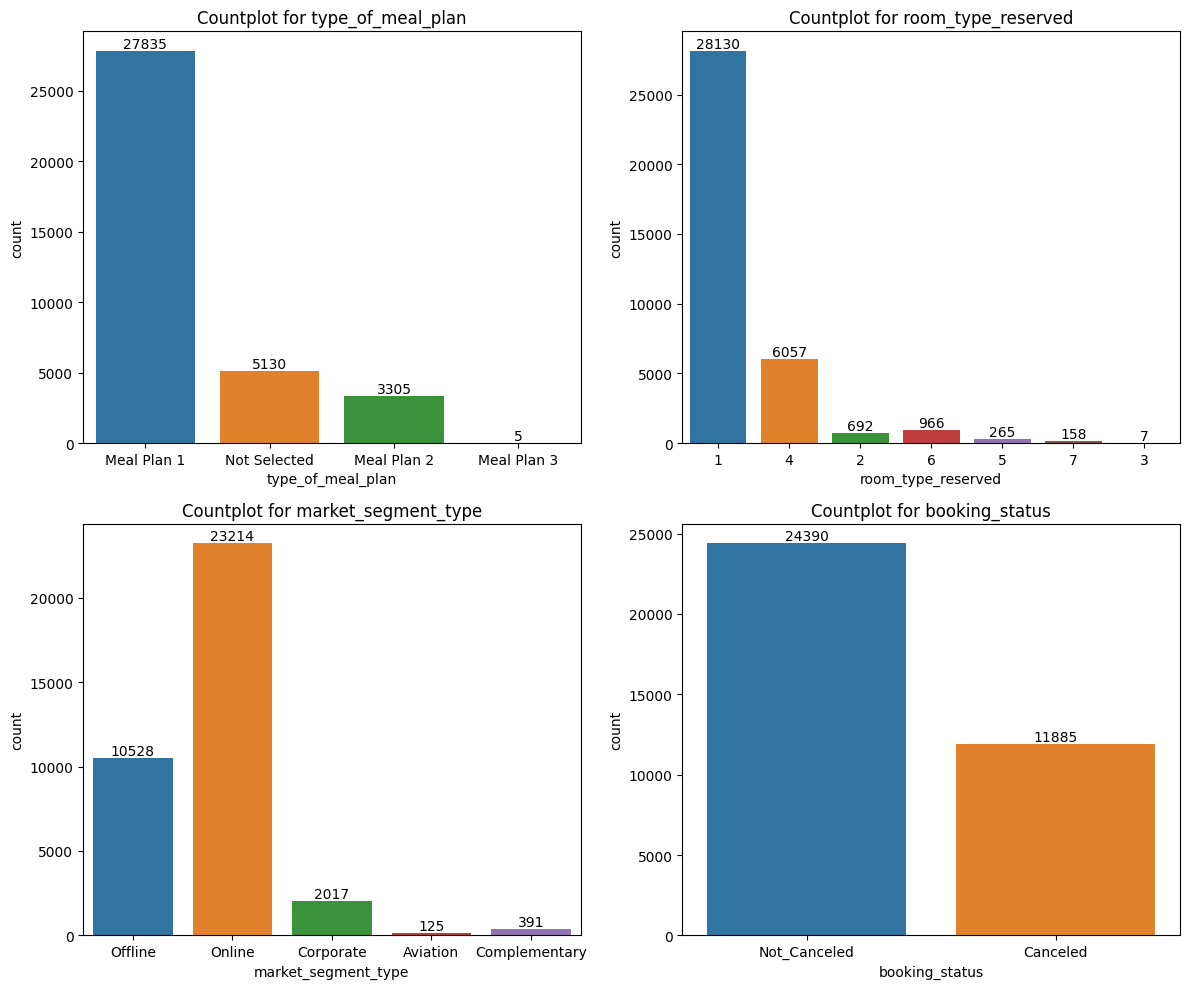

In [38]:
cols = cat_cols[1:]

plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x = df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')
    
plt.tight_layout()
plt.show()

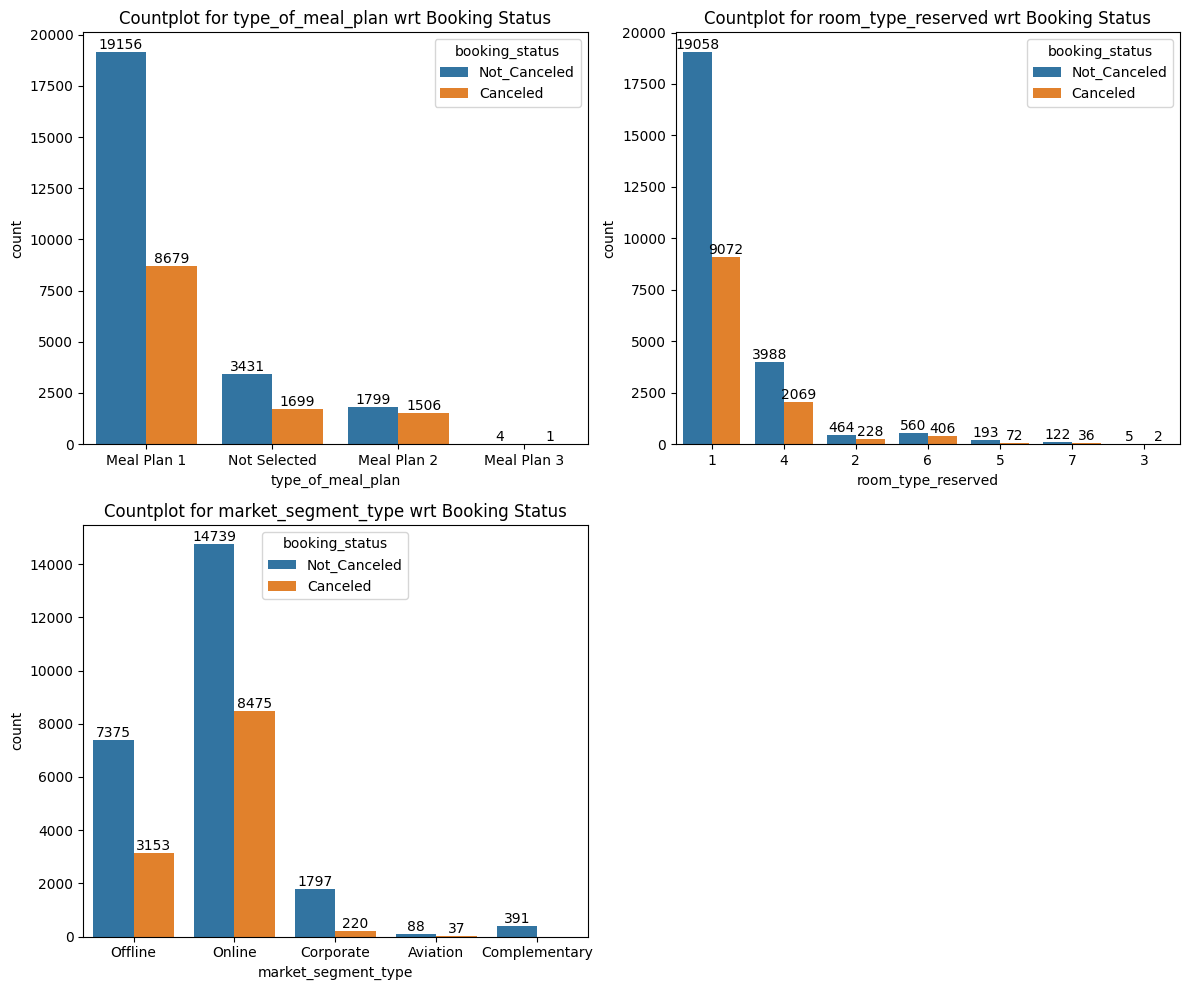

In [43]:
cols = cat_cols[1:-1]

plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x = df[cols[i]],hue=df['booking_status'])
    for j in ax.containers:
        ax.bar_label(j)
    plt.title(f'Countplot for {cols[i]} wrt Booking Status')
    
plt.tight_layout()
plt.show()

In [44]:
for i in num_cols:
    print(f'feature {i} | Count of Unique values {df[i].nunique()}')

feature no_of_adults | Count of Unique values 5
feature no_of_children | Count of Unique values 6
feature no_of_weekend_nights | Count of Unique values 8
feature no_of_week_nights | Count of Unique values 18
feature required_car_parking_space | Count of Unique values 2
feature lead_time | Count of Unique values 352
feature arrival_year | Count of Unique values 2
feature arrival_month | Count of Unique values 12
feature arrival_date | Count of Unique values 31
feature repeated_guest | Count of Unique values 2
feature no_of_previous_cancellations | Count of Unique values 9
feature no_of_previous_bookings_not_canceled | Count of Unique values 59
feature avg_price_per_room | Count of Unique values 3930
feature no_of_special_requests | Count of Unique values 6


In [45]:
num_cols

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

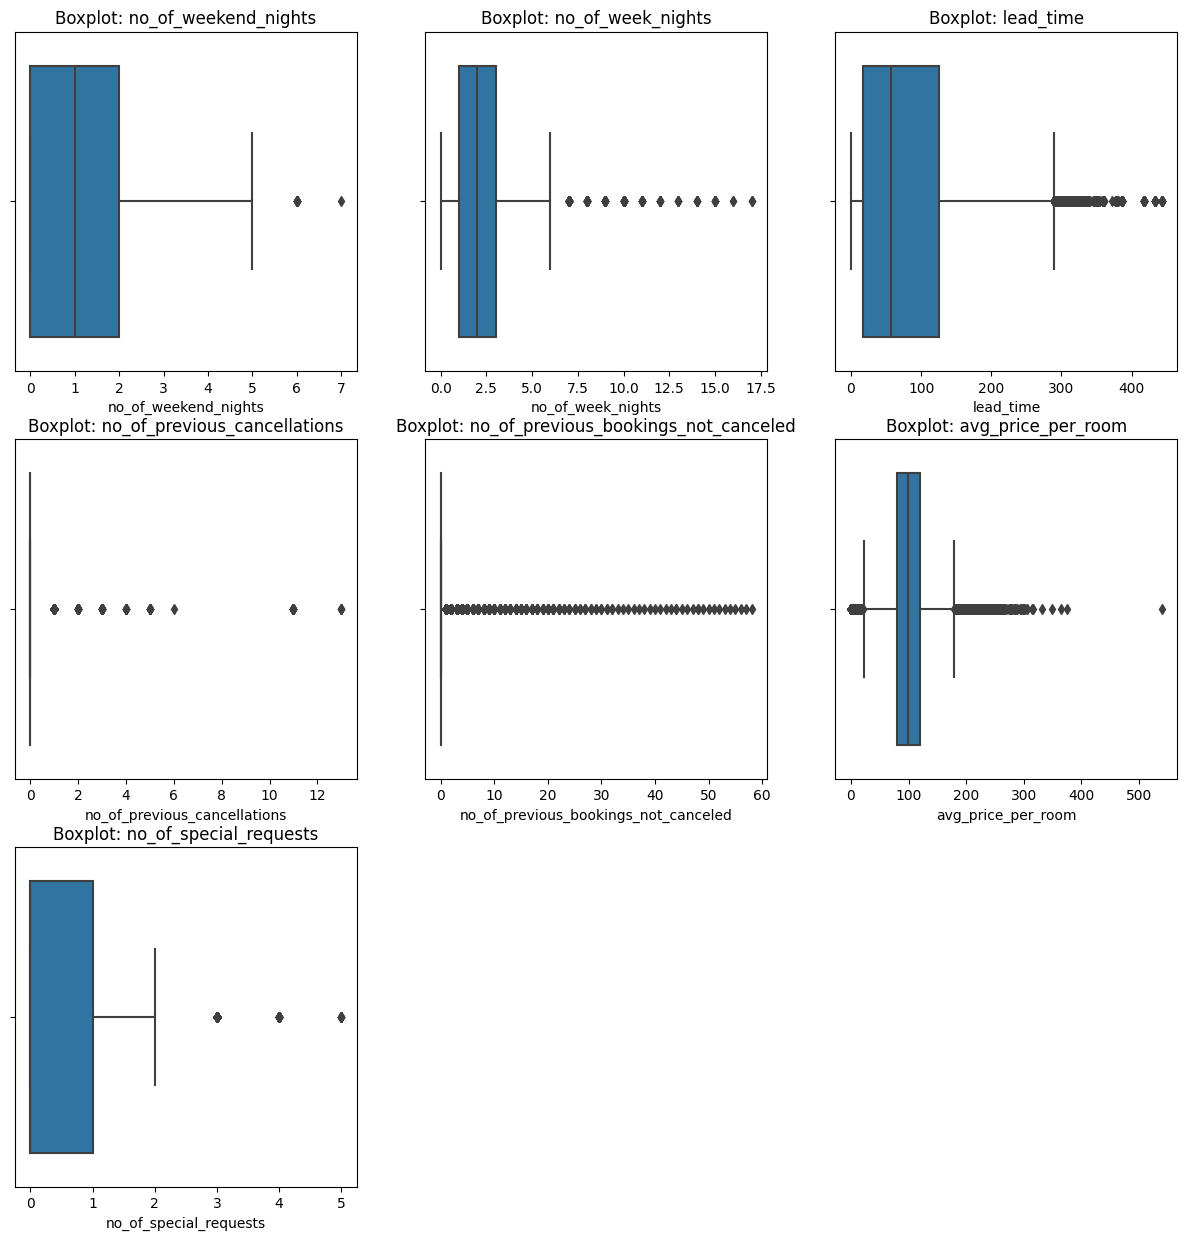

In [46]:
cols = ['no_of_weekend_nights','no_of_week_nights', 'lead_time',
        'no_of_previous_cancellations', 
        'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

plt.figure(figsize=(15,15))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot: {cols[i]}')
plt.show()

In [47]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [48]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


#### Inference
1) Min Avg price is 0. (highly unlikely).<br>
2) Simultaneously no_of_adults and no_of_children should not be 0.<br>

In [49]:
print(df[(df['no_of_adults']==0) & (df['no_of_children']==0)].shape)
print(df[(df['no_of_weekend_nights']==0) & (df['no_of_week_nights']==0)].shape)
# Customer is not staying at night

# print(df[df['no_of_children']==0].shape)
# print(df[df['no_of_adults']==0].shape)
# print(df[df['no_of_adults']==0].shape)

(0, 19)
(78, 19)


In [50]:
df[(df['no_of_weekend_nights']==0) & (df['no_of_week_nights']==0)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
209,INN00210,1,0,0,0,Meal Plan 1,0,1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
1158,INN01159,2,0,0,0,Meal Plan 1,0,1,145,2018,7,5,Online,0,0,0,0.0,1,Not_Canceled
1403,INN01404,3,0,0,0,Meal Plan 1,0,4,57,2018,4,1,Online,0,0,0,0.0,2,Not_Canceled
1907,INN01908,2,0,0,0,Meal Plan 2,0,1,247,2018,6,6,Online,0,0,0,0.0,1,Not_Canceled
1986,INN01987,2,0,0,0,Meal Plan 1,0,1,43,2017,10,17,Online,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33218,INN33219,1,0,0,0,Meal Plan 1,0,1,1,2018,2,6,Online,0,0,0,0.0,0,Not_Canceled
33537,INN33538,2,0,0,0,Meal Plan 1,0,2,166,2018,4,21,Online,0,0,0,0.0,2,Not_Canceled
34750,INN34751,1,0,0,0,Meal Plan 1,0,4,1,2017,10,22,Complementary,0,0,0,0.0,0,Not_Canceled
35472,INN35473,1,0,0,0,Meal Plan 1,0,1,7,2018,2,15,Online,0,0,0,0.0,0,Not_Canceled


In [57]:
print(df.shape)
print(df[df['avg_price_per_room']==0].shape)
print(((545/df.shape[0])*100))

(36275, 19)
(545, 19)
1.5024121295658166


#### Correlation

C:\Users\Dell\AppData\Local\Temp\ipykernel_6700\478359969.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


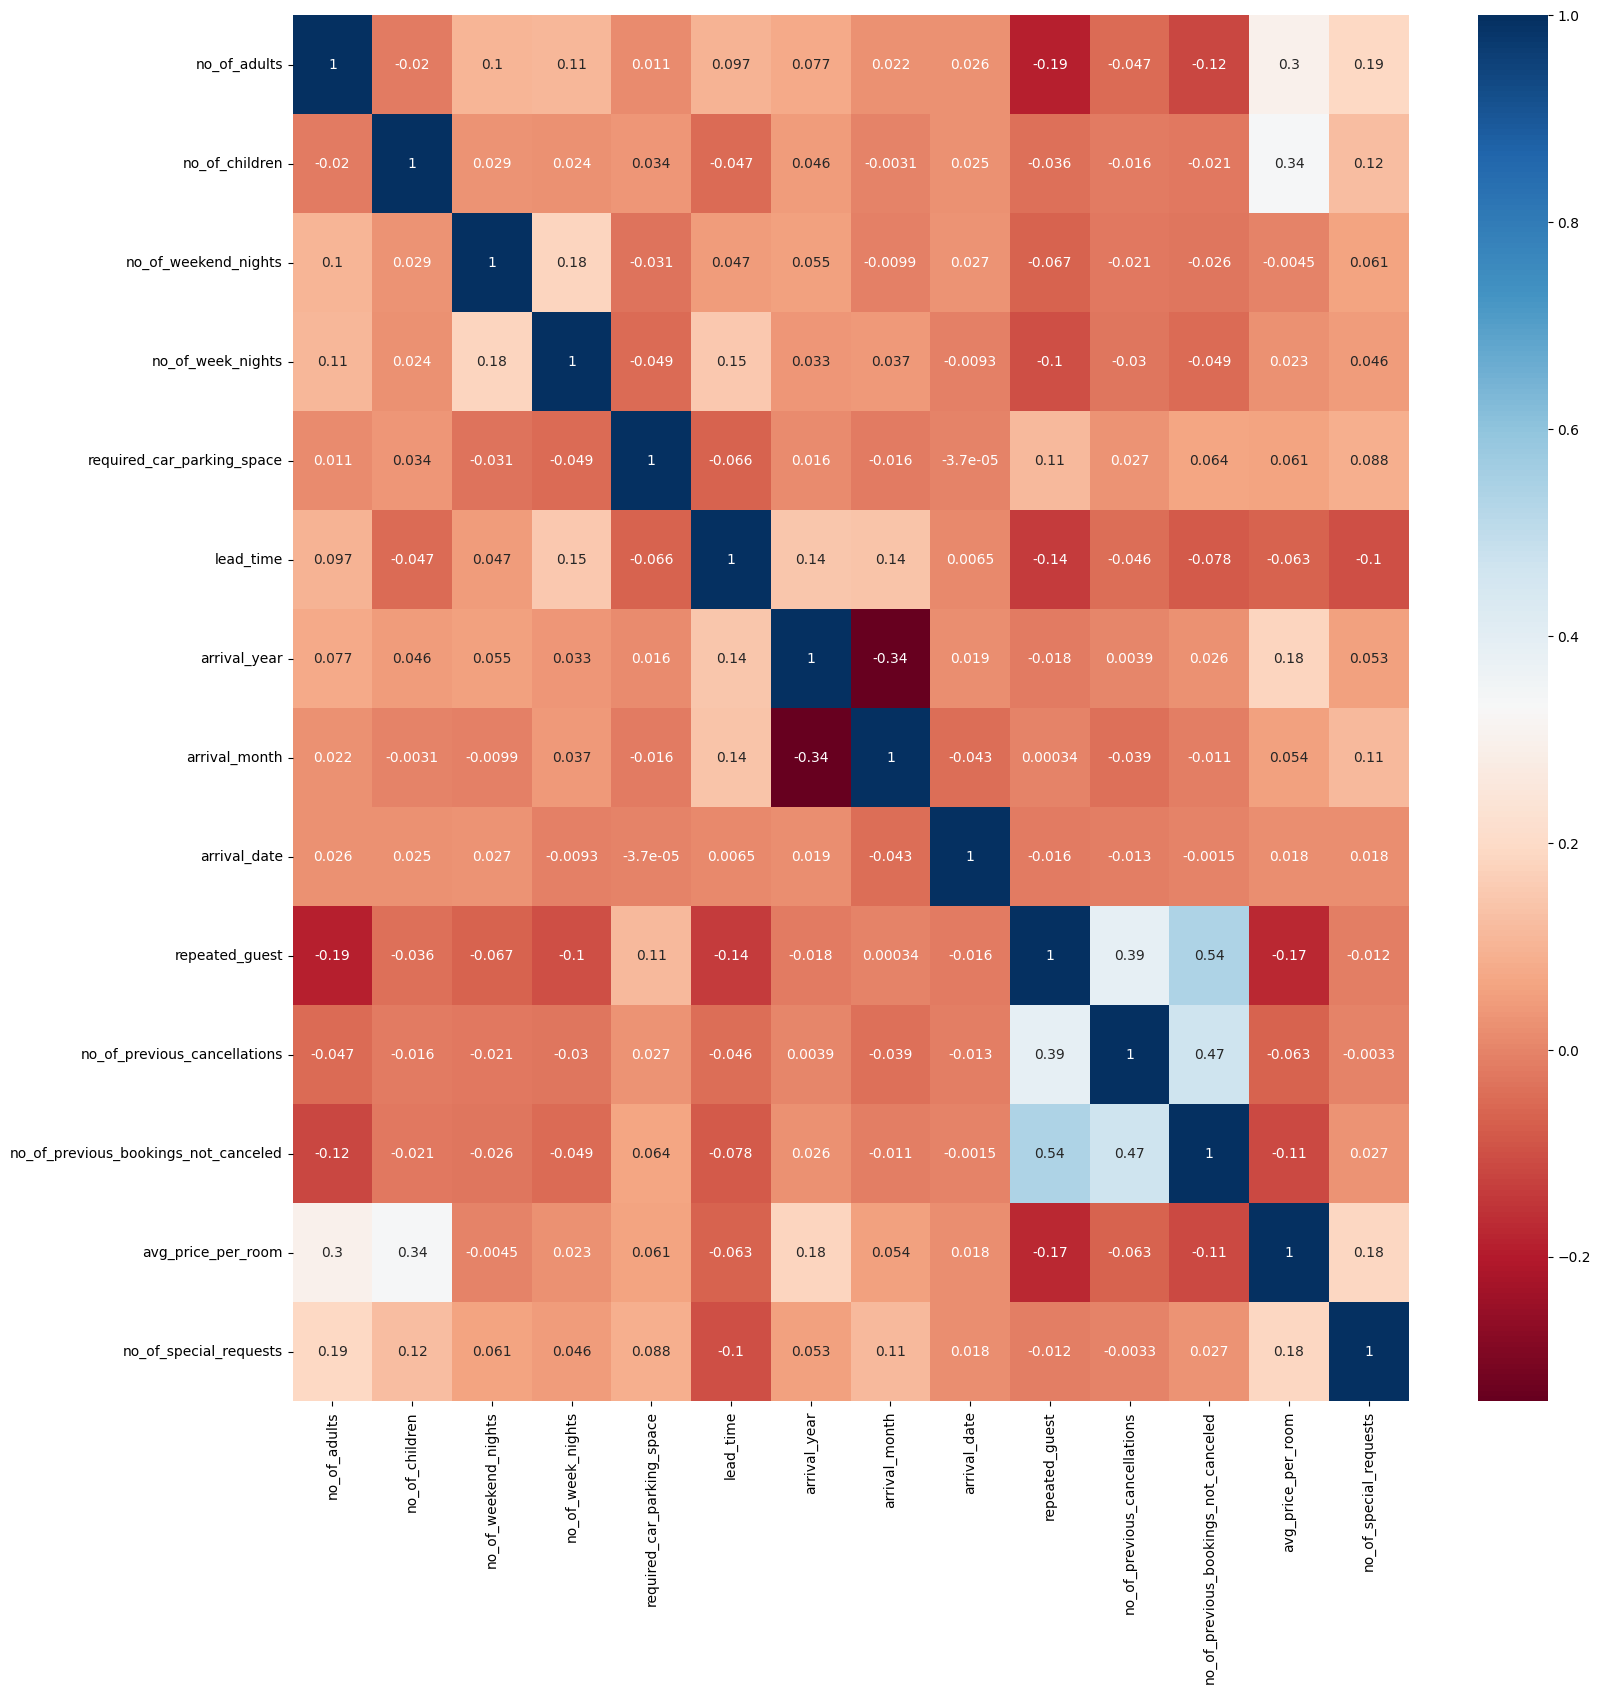

In [59]:
corr = df.corr()

plt.figure(figsize=(18,18))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

#### Outlier Treatment

In [61]:
cols = ['no_of_previous_bookings_not_canceled','lead_time',
        'avg_price_per_room']
a = df[cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
no_of_previous_bookings_not_canceled,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.000,1.0000,4.0,58.0
lead_time,0.0,0.0,0.00,0.00,1.0,57.00,273.0,301.000,314.0000,346.0,443.0
avg_price_per_room,0.0,0.0,41.43,54.09,61.0,99.45,165.0,178.956,190.5416,208.0,540.0


In [63]:
print(df[df['avg_price_per_room']>208].shape)  # 99% ile
print(df[df['avg_price_per_room']<41.43].shape) # 2%ile
print(df[df['lead_time']>346].shape)   # 99%ile
print(df[df['no_of_previous_bookings_not_canceled']>4].shape)

(361, 19)
(721, 19)
(302, 19)
(327, 19)


In [37]:
df.shape

(36275, 19)

In [82]:
# (1400/df.shape[0])*100

#### Outlier Treatment

In [64]:
df['avg_price_per_room'] = np.where(df['avg_price_per_room']>208,208,df['avg_price_per_room'])
df['avg_price_per_room'] = np.where(df['avg_price_per_room']<41.43,41.43,df['avg_price_per_room'])

In [65]:
df['lead_time'] = np.where(df['lead_time']>346,346,df['lead_time'])
df['no_of_previous_bookings_not_canceled'] = np.where(df['no_of_previous_bookings_not_canceled']>4,4,df['no_of_previous_bookings_not_canceled'])

In [67]:
a = df[cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
no_of_previous_bookings_not_canceled,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.000,1.0000,4.0,4.0
lead_time,0.00,0.00,0.00,0.00,1.0,57.00,273.0,301.000,314.0000,346.0,346.0
avg_price_per_room,41.43,41.43,41.43,54.09,61.0,99.45,165.0,178.956,190.5416,208.0,208.0


In [68]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [69]:
df['room_type_reserved'] = pd.to_numeric(df['room_type_reserved'])
# OR
# df['room_type_reserved'] = df['room_type_reserved'].astype(int)

In [70]:
df1 = df.copy()

In [72]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

#### Encoding Catgorical Features

In [73]:
cols = ['type_of_meal_plan','market_segment_type']
df_dum = pd.get_dummies(data=df,columns=cols,drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(36275, 24)
Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'room_type_reserved',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')


In [80]:
df_dum['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [81]:
df_dum['booking_status'] = df_dum['booking_status'].replace({'Not_Canceled':1,
                                                            'Canceled':0})
df_dum['booking_status'].value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [106]:
df_dum['booking_status'].value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

#### Select x and y

In [82]:
x = df_dum.drop(['Booking_ID','booking_status'],axis=1)
y = df_dum['booking_status']
print(x.shape)
print(y.shape)

(36275, 22)
(36275,)


In [83]:
x.dtypes.value_counts()

int64      14
uint8       7
float64     1
dtype: int64

#### Split data inot train and test

In [87]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,
                                                 random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25392, 22)
(10883, 22)
(25392,)
(10883,)


In [94]:
# df_dum.dtypes

#### Function to evaluate model

In [91]:
from sklearn.metrics import *

In [100]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    pre_can = precision_score(y_test,ypred,pos_label=0)
    rec_can = recall_score(y_test,ypred,pos_label=0)
    res_df = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc,
                           'Pre_Can':pre_can,'Recall_Can':rec_can},
                          index=[mname])
    print('Confusion_Matrix\n',cm)
    print('Classification Report\n',cr)
    return res_df,ypred

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Log Reg

In [104]:
lr1 = LogisticRegression(max_iter=100000)
lr_res,ypred_lr1 = eval_model(lr1,x_train,y_train,x_test,y_test,'LogReg')

Confusion_Matrix
 [[2204 1403]
 [ 742 6534]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.61      0.67      3607
           1       0.82      0.90      0.86      7276

    accuracy                           0.80     10883
   macro avg       0.79      0.75      0.77     10883
weighted avg       0.80      0.80      0.80     10883



In [105]:
lr_res

,Train_Acc,Test_Acc,Pre_Can,Recall_Can
LogReg,0.798716,0.802904,0.748133,0.611034


In [ ]:
#### Target 1 : best_thresh <0.5 => Target1 => Recall increases
#### Target 1 : best_thresh >0.5 => Target0 => Recall increases

#### ROC_AUC
#### Best Threshold
#### New Prediction based on Best Threshold

#### DT

In [116]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=12,
                            min_samples_split=15)
dt_res,ypred_dt = eval_model(dt,x_train,y_train,x_test,y_test,'DTree')
dt_res

Confusion_Matrix
 [[2824  783]
 [ 592 6684]]
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      3607
           1       0.90      0.92      0.91      7276

    accuracy                           0.87     10883
   macro avg       0.86      0.85      0.86     10883
weighted avg       0.87      0.87      0.87     10883



,Train_Acc,Test_Acc,Pre_Can,Recall_Can
DTree,0.897842,0.873656,0.826698,0.782922


#### Hyperparameter Tuning

In [113]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [118]:
hparams_df = {'criterion':['gini','entropy'],
             'max_depth':[8,9,10,12,14],
             'min_samples_split':[7,10,12,15]}
# combinations = 2*5*4 = 40

In [119]:
dt_base = DecisionTreeClassifier(random_state=0)
rs1 = RandomizedSearchCV(dt_base, param_distributions=hparams_df,
                        scoring='accuracy',cv=5)
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [8, 9, 10, 12, 14],
                                        'min_samples_split': [7, 10, 12, 15]},
                   scoring='accuracy')

In [120]:
print(rs1.best_score_)
print(rs1.best_params_)

0.8738185196929088
{'min_samples_split': 15, 'max_depth': 12, 'criterion': 'gini'}


#### RF

In [122]:
rf = RandomForestClassifier(n_estimators=80,criterion='gini',
                            max_depth=12,min_samples_split=15)
rf_res,ypred_rf = eval_model(rf,x_train,y_train,x_test,y_test,
                             'Random Forest')
rf_res

Confusion_Matrix
 [[2723  884]
 [ 409 6867]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.75      0.81      3607
           1       0.89      0.94      0.91      7276

    accuracy                           0.88     10883
   macro avg       0.88      0.85      0.86     10883
weighted avg       0.88      0.88      0.88     10883



,Train_Acc,Test_Acc,Pre_Can,Recall_Can
Random Forest,0.891265,0.881191,0.869413,0.754921


In [123]:
all_res = pd.concat([lr_res,dt_res,rf_res])
all_res

,Train_Acc,Test_Acc,Pre_Can,Recall_Can
LogReg,0.798716,0.802904,0.748133,0.611034
DTree,0.897842,0.873656,0.826698,0.782922
Random Forest,0.891265,0.881191,0.869413,0.754921


In [ ]:
#### Hyperparameter Tuning on RF
#### - RandomizedSearchCV

#### Model Saving

In [125]:
import pickle

In [127]:
pickle.dump(lr1,open('hotel_cancel_logreg.pkl','wb'))
pickle.dump(dt,open('hotel_cancel_dt.pkl','wb'))
pickle.dump(rf,open('hotel_cancel_rf.pkl','wb'))

In [ ]:
# !pip install streamlit